TASK 2
Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [92]:
# import libraries
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt



In [93]:
#load data
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [94]:
# check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [95]:
target='Annual Income (k$)'

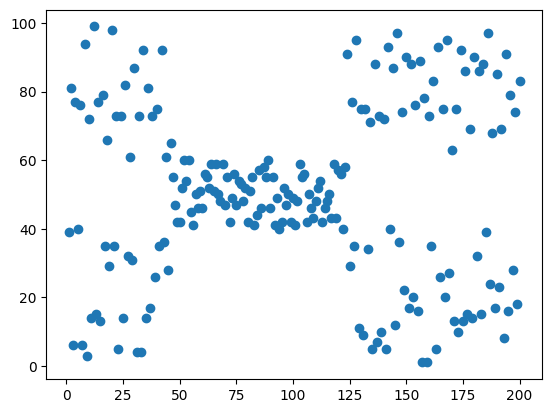

In [96]:
#visualize the data with customer id and spending score
plt.scatter(df['CustomerID'], df['Spending Score (1-100)'])


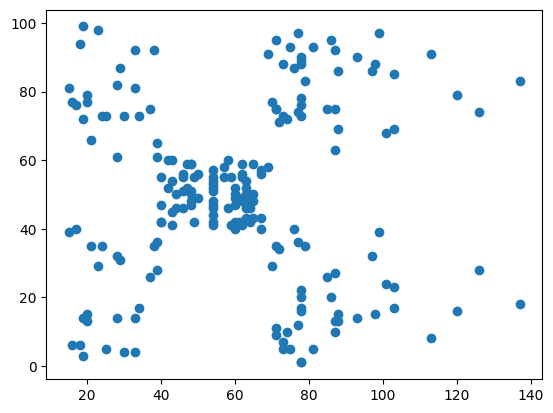

In [97]:
#visualize the data with Annual Income (k$) and spending score
plt.scatter(df[target], df['Spending Score (1-100)'])
plt.show()

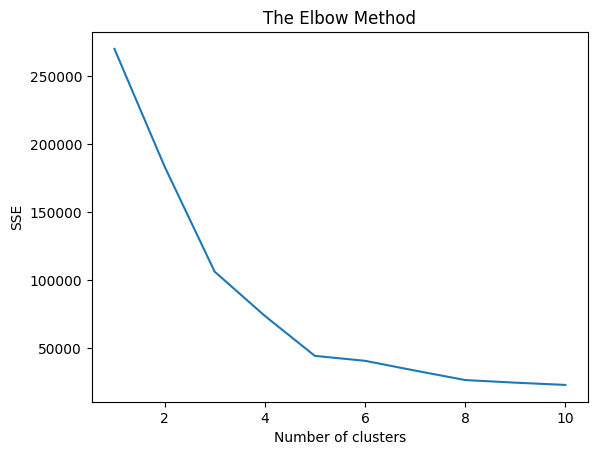

In [98]:
# Using the elbow method to find the optimal number of clusters
sse=[]
X = df[[target, 'Spending Score (1-100)']]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)  
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()
    
      

In [99]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = y_kmeans


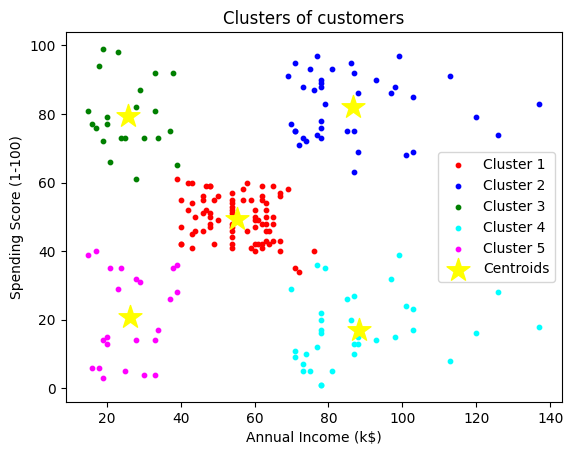

In [100]:
# Visualising the clusters
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
df4 = df[df.Cluster == 3]
df5 = df[df.Cluster == 4]
plt.scatter(df1[target], df1['Spending Score (1-100)'], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(df2[target], df2['Spending Score (1-100)'], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(df3[target], df3['Spending Score (1-100)'], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(df4[target], df4['Spending Score (1-100)'], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(df5[target], df5['Spending Score (1-100)'], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', marker='*', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel(target)
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


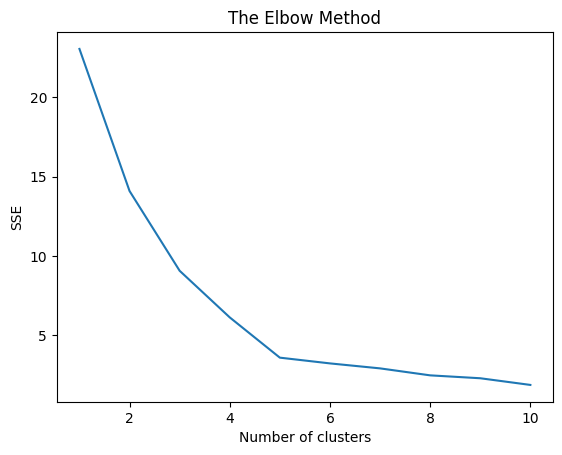

In [101]:
#Reapeat the process with using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[[target, 'Spending Score (1-100)']])
sse=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [102]:
df_scaled = pd.DataFrame(df_scaled, columns = [target, 'Spending Score (1-100)'])

In [103]:
# Fitting K-Means to the scaled dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_scaled)
df_scaled['Cluster'] = y_kmeans
kmeans.cluster_centers_


array([[0.32695811, 0.49533888],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894],
       [0.59631148, 0.16921769],
       [0.08792846, 0.19619666]])

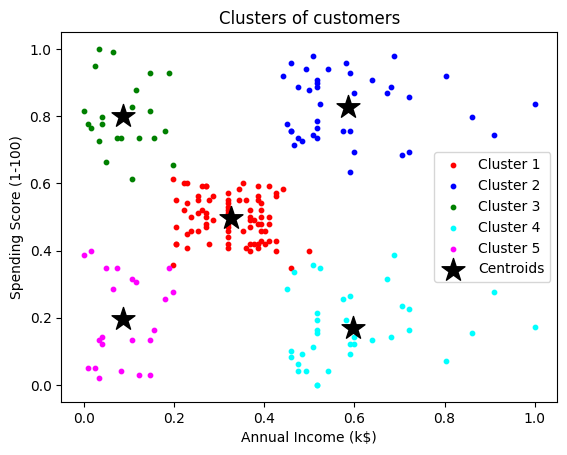

In [104]:
# Visualising the clusters
df1 = df_scaled[df_scaled.Cluster == 0]
df2 = df_scaled[df_scaled.Cluster == 1]
df3 = df_scaled[df_scaled.Cluster == 2]
df4 = df_scaled[df_scaled.Cluster == 3]
df5 = df_scaled[df_scaled.Cluster == 4]
plt.scatter(df1[target], df1['Spending Score (1-100)'], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(df2[target], df2['Spending Score (1-100)'], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(df3[target], df3['Spending Score (1-100)'], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(df4[target], df4['Spending Score (1-100)'], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(df5[target], df5['Spending Score (1-100)'], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', marker='*', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

